In [1]:
!pip install tensorflow

In [2]:
import os

image_dir = os.path.join("../data", "imagenet_224")

In [3]:
import tensorflow as tf

In [9]:
class_names = os.listdir(image_dir)
num_classes = len(class_names)
image_height = 224
image_width = 224
image_size = (image_height, image_width)
batch_size = 32

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

validation_set = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)


Found 14738 files belonging to 10 classes.
Using 10317 files for training.
Found 14738 files belonging to 10 classes.
Using 2947 files for validation.


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

training_set = training_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)
     

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [16]:
input = Input(shape=(image_height, image_width, 3))

x = Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(input)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(units=128, activation="relu")(x)

output = Dense(units=num_classes, activation="softmax")(x)

model = Model(input, output)

print(model.summary())



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,856,618 (49.04 MB)

 Trainable params: 12,856,618 (49.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[
                  CategoricalAccuracy(),
                  TopKCategoricalAccuracy()
              ])

In [18]:
epochs = 30
history = model.fit(training_set, validation_data=validation_set, epochs=epochs)

Epoch 1/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 86s 264ms/step - categorical_accuracy: 0.1629 - loss: 127.4475 - top_k_categorical_accuracy: 0.6618 - val_categorical_accuracy: 0.2070 - val_loss: 2.1694 - val_top_k_categorical_accuracy: 0.7109
Epoch 2/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 95s 293ms/step - categorical_accuracy: 0.2917 - loss: 2.0160 - top_k_categorical_accuracy: 0.7922 - val_categorical_accuracy: 0.2206 - val_loss: 2.2286 - val_top_k_categorical_accuracy: 0.7275
Epoch 3/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 100s 309ms/step - categorical_accuracy: 0.4231 - loss: 1.6705 - top_k_categorical_accuracy: 0.8544 - val_categorical_accuracy: 0.2535 - val_loss: 2.3864 - val_top_k_categorical_accuracy: 0.7737
Epoch 4/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 96s 298ms/step - categorical_accuracy: 0.5604 - loss: 1.3365 - top_k_categorical_accuracy: 0.9013 - val_categorical_accuracy: 0.2464 - val_loss: 2.8541 - val_top_k_categorical_accuracy: 0.7577
Epoch 5/30
323/323 ━━━━━━━━━━━━━━━━━━━━ 97s 301ms/step - categori

In [19]:
import pickle

with open(os.path.join("../data", "history_control.pkl"), "wb") as file:
    pickle.dump(history, file)

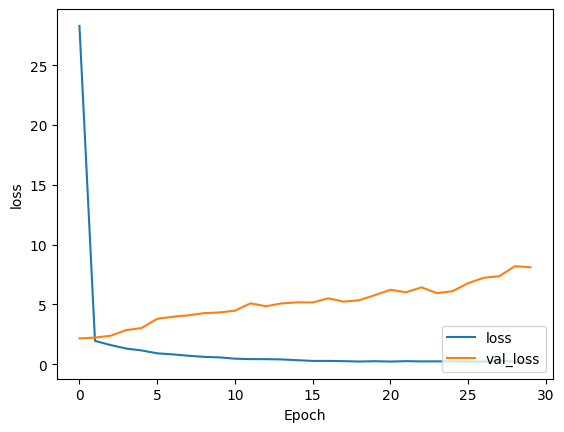

In [24]:
import matplotlib.pyplot as plt

def plot_accuracy_curve(training_result, metric):
    val_metric = f"val_{metric}"
    train_perf = training_result.history[metric]
    validation_perf = training_result.history[val_metric]
    
    plt.plot(train_perf, label=metric)
    plt.plot(validation_perf, label=val_metric)
    
    max_val = max(validation_perf)
    max_val_epoch = validation_perf.index(max_val)
    
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend(loc="lower right")
    
# plot_accuracy_curve(history, "categorical_accuracy")
# plot_accuracy_curve(history, "top_k_categorical_accuracy")
plot_accuracy_curve(history, "loss")